In [149]:
import geopandas as gpd
import matplotlib.pyplot as plt
import folium
from folium.plugins import MarkerCluster

In [150]:
# Load the shapefile for Bangladesh
bangladesh_shapefile = gpd.read_file('bgd_adm_bbs_20201113_SHP/bgd_admbnda_adm0_bbs_20201113.shp')
# bangladesh_shapefile = gpd.read_file('bgd_adm_bbs_20201113_SHP/BGD_adm0.shp')

# bangladesh_shapefile = gpd.read_file('bgd_adm_bbs_20201113_SHP/bgd_admbnda_adm1_bbs_20201113.shp')
# bangladesh_shapefile = gpd.read_file('bgd_adm_bbs_20201113_SHP/bgd_admbnda_adm2_bbs_20201113.shp')
# bangladesh_shapefile = gpd.read_file('bgd_adm_bbs_20201113_SHP/bgd_admbnda_adm3_bbs_20201113.shp')
# bangladesh_shapefile = gpd.read_file('bgd_adm_bbs_20201113_SHP/bgd_admbnda_adm4_bbs_20201113.shp')
# bangladesh_shapefile = gpd.read_file('bgd_adm_bbs_20201113_SHP/bgd_admbndp_admALL_bbs_itos_20201113.shp')



In [151]:
import pandas as pd

In [152]:
# Load your CSV file
data = pd.read_csv('rwi-only.csv')

In [153]:
# Merge the shapefile with your data based on latitude and longitude
geo_data = gpd.GeoDataFrame(data, geometry=gpd.points_from_xy(data.longitude, data.latitude))
geo_data = gpd.sjoin(geo_data, bangladesh_shapefile, how='inner', op='within')

/Users/omarshehab/anaconda3/envs/py39/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3445: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if await self.run_code(code, result, async_=asy):
/var/folders/c4/y_hc0pmx0p5gk1zsyyx03_lw0000gn/T/ipykernel_77084/3641659272.py:3: UserWarning: CRS mismatch between the CRS of left geometries and the CRS of right geometries.
Use `to_crs()` to reproject one of the input geometries to match the CRS of the other.

Left CRS: None
Right CRS: EPSG:4326

  geo_data = gpd.sjoin(geo_data, bangladesh_shapefile, how='inner', op='within')


<Axes: >

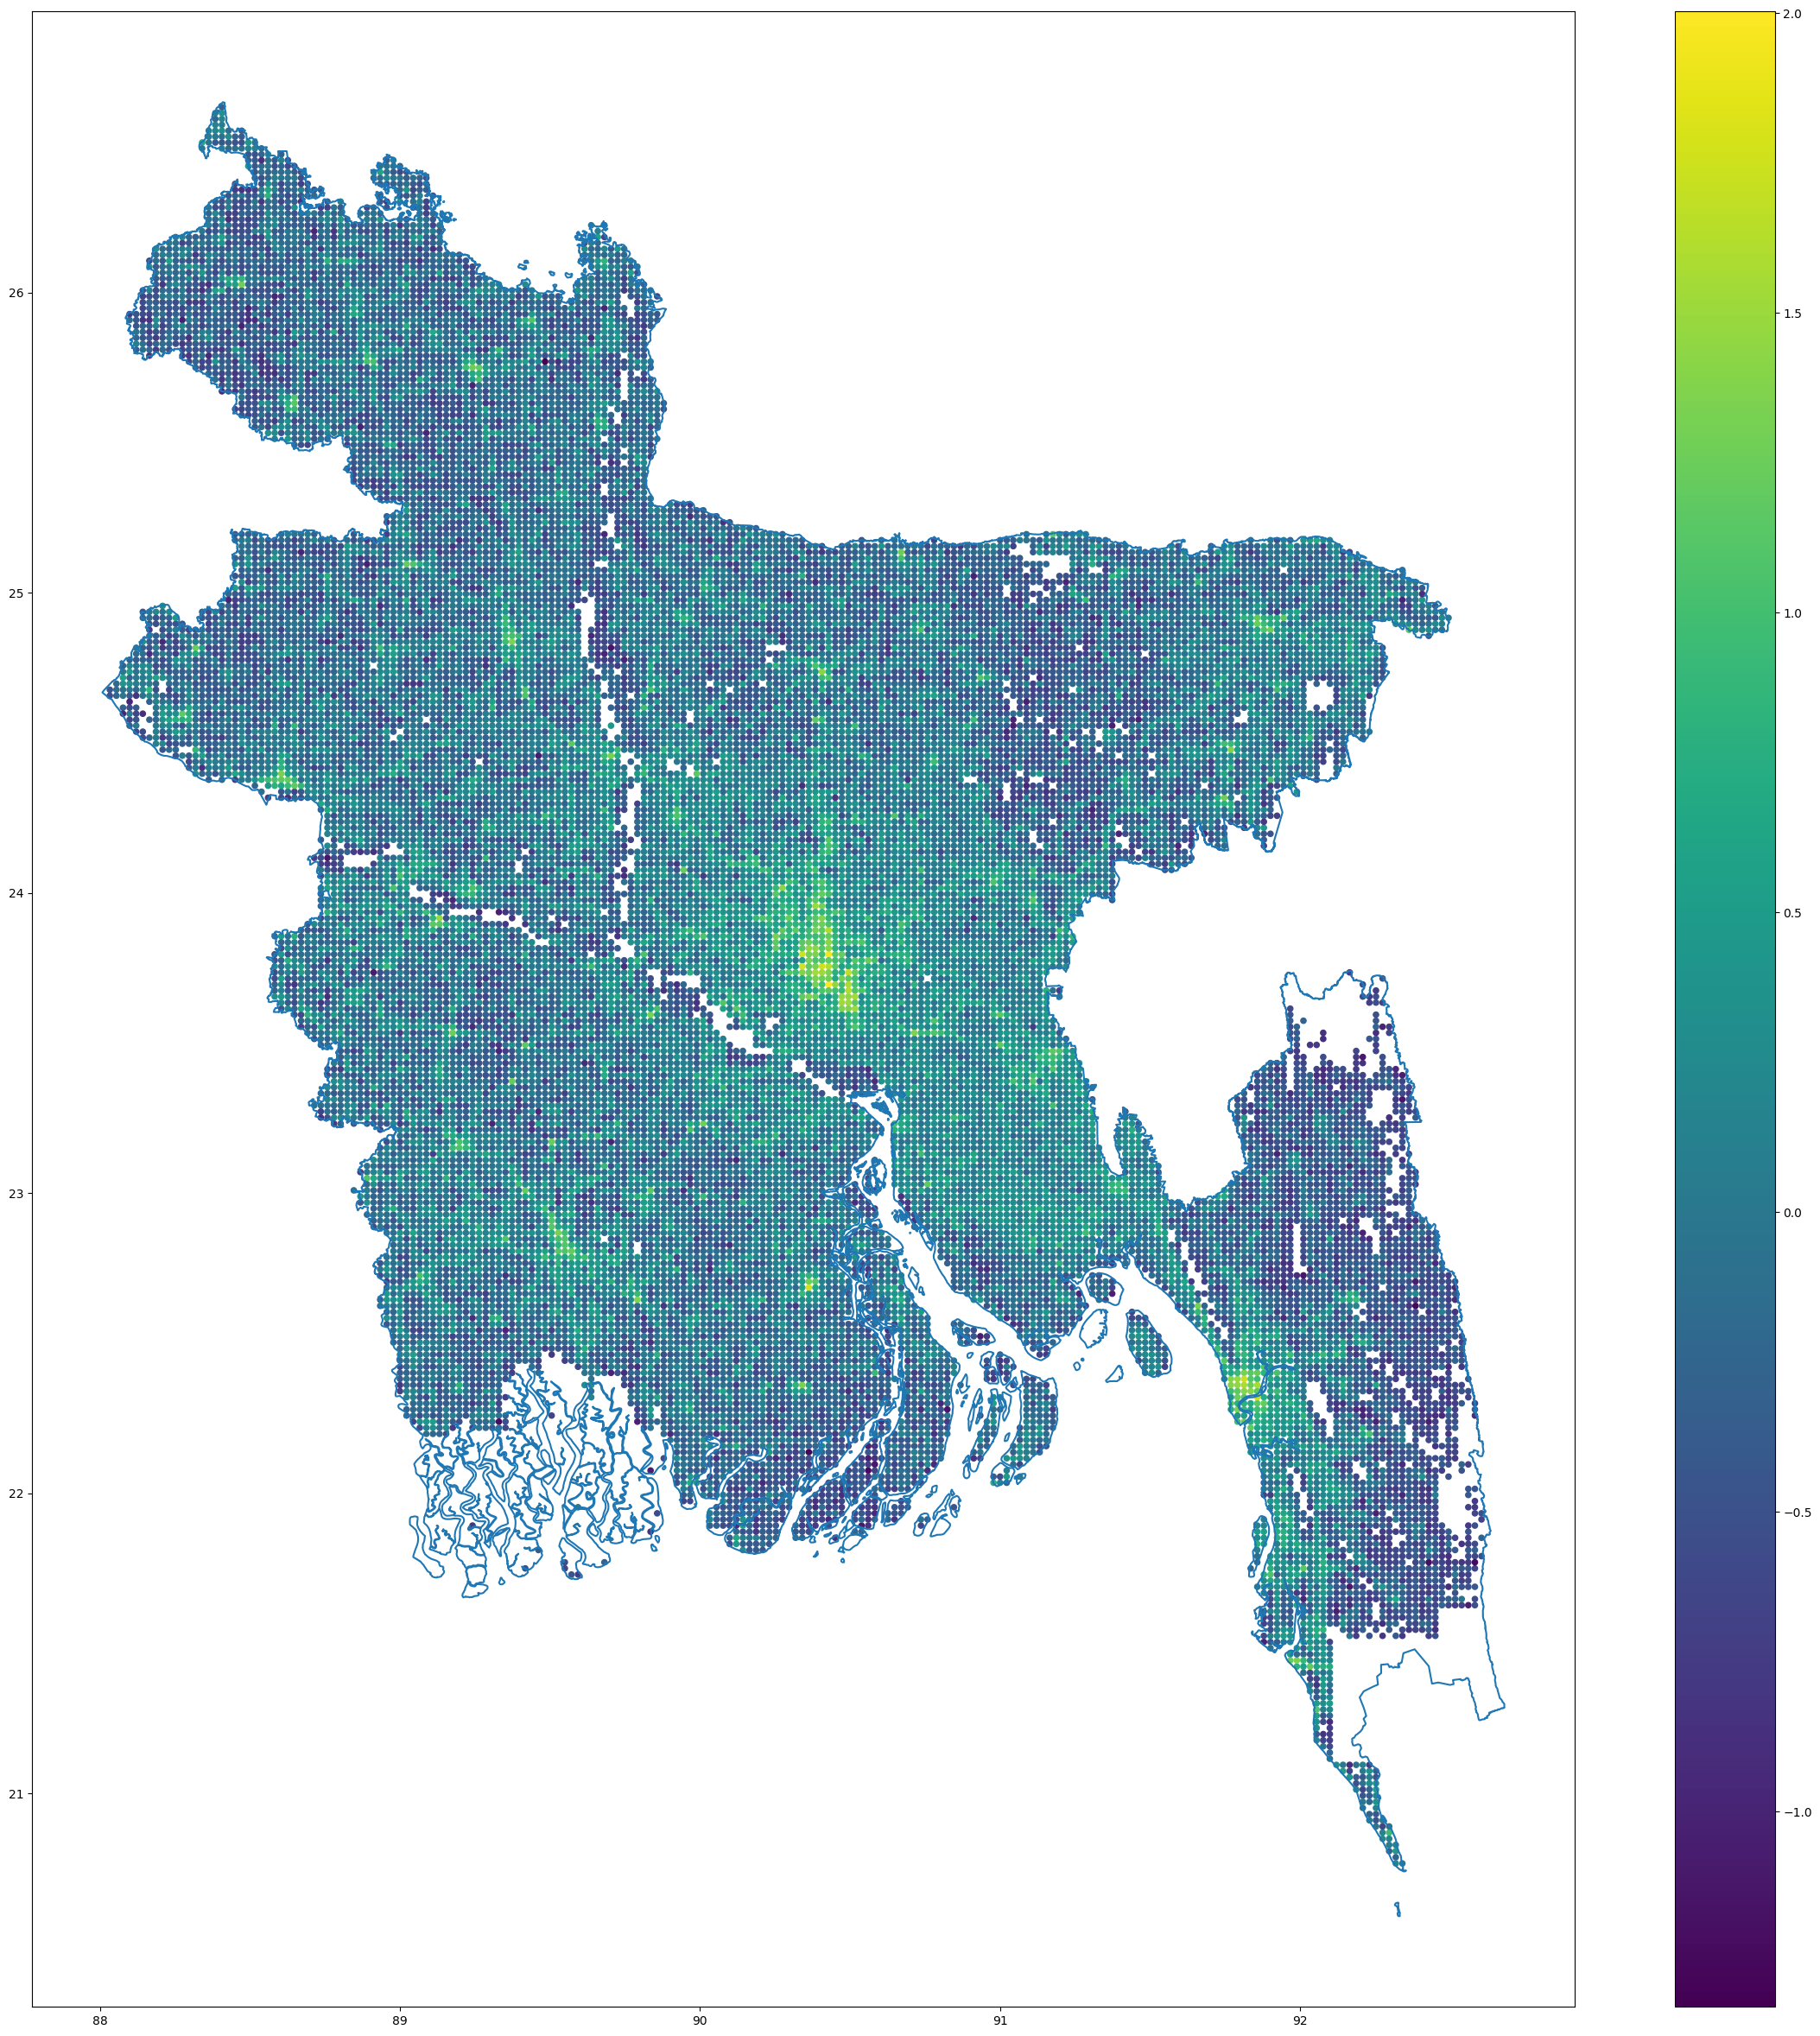

In [177]:
# Plot the map using matplotlib
fig, ax = plt.subplots(1, 1, figsize=(30, 30))
bangladesh_shapefile.boundary.plot(ax=ax)
geo_data.plot(column='rwi', cmap='viridis', legend=True, ax=ax, markersize = 20)


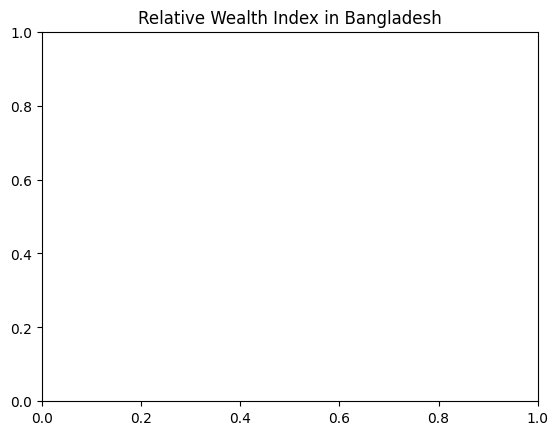

In [155]:
plt.title('Relative Wealth Index in Bangladesh')
plt.show()

In [156]:
# Create an interactive map using folium
m = folium.Map(location=[geo_data['latitude'].mean(), geo_data['longitude'].mean()], zoom_start=7)


In [157]:
# Add MarkerClusters for better visualization of points on the map
marker_cluster = MarkerCluster().add_to(m)


In [158]:
# Add markers for each point with Relative Wealth Index as popup
for idx, row in geo_data.iterrows():
    folium.Marker([row['latitude'], row['longitude']],
                  popup=f"Relative Wealth Index: {row['rwi']}").add_to(marker_cluster)

In [159]:
# Save the interactive map as an HTML file
m.save('map_with_relative_wealth_index.html')